In [1]:
#https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data/version/3

#Wczytanie i obróbka danych

In [2]:
import pandas as pd

df =pd.read_csv('AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
df_small = df[['id', 'neighbourhood_group', 'room_type', 'minimum_nights', 'price', 'availability_365', 'number_of_reviews']]

In [5]:
df_small.head()

,id,neighbourhood_group,room_type,minimum_nights,price,availability_365,number_of_reviews
0,2539,Brooklyn,Private room,1,149,365,9
1,2595,Manhattan,Entire home/apt,1,225,355,45
2,3647,Manhattan,Private room,3,150,365,0
3,3831,Brooklyn,Entire home/apt,1,89,194,270
4,5022,Manhattan,Entire home/apt,10,80,0,9


In [6]:
df_small.describe()

,id,minimum_nights,price,availability_365,number_of_reviews
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,7.029962,152.720687,112.781327,23.274466
std,1.098311e+07,20.510550,240.154170,131.622289,44.550582
min,2.539000e+03,1.000000,0.000000,0.000000,0.000000
25%,9.471945e+06,1.000000,69.000000,0.000000,1.000000
50%,1.967728e+07,3.000000,106.000000,45.000000,5.000000
75%,2.915218e+07,5.000000,175.000000,227.000000,24.000000
max,3.648724e+07,1250.000000,10000.000000,365.000000,629.000000


In [7]:
df_small.neighbourhood_group.value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [8]:
df_small.room_type.value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [9]:
df_small.isnull().sum()

id                     0
neighbourhood_group    0
room_type              0
minimum_nights         0
price                  0
availability_365       0
number_of_reviews      0
dtype: int64

In [10]:
neighbourhood = ['Manhattan', 'Brooklyn']

In [11]:
#ograniczenie zbioru
df_small = df_small[df_small.neighbourhood_group.isin(neighbourhood)]
df_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41765 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   41765 non-null  int64 
 1   neighbourhood_group  41765 non-null  object
 2   room_type            41765 non-null  object
 3   minimum_nights       41765 non-null  int64 
 4   price                41765 non-null  int64 
 5   availability_365     41765 non-null  int64 
 6   number_of_reviews    41765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.5+ MB


In [12]:
#zamiana wartości tekstowych na liczbowe
d = {'Manhattan': 0, 'Brooklyn': 1}
df_small['neighbourhood_group'] = df_small['neighbourhood_group'].map(d).fillna(df_small['neighbourhood_group'])
df_small.head()

,id,neighbourhood_group,room_type,minimum_nights,price,availability_365,number_of_reviews
0,2539,1,Private room,1,149,365,9
1,2595,0,Entire home/apt,1,225,355,45
2,3647,0,Private room,3,150,365,0
3,3831,1,Entire home/apt,1,89,194,270
4,5022,0,Entire home/apt,10,80,0,9


In [13]:
#zamiana wartości tekstowych na liczbowe
room = {'Entire home/apt':0, 'Private room':1, 'Shared room':2}
df_small['room_type'] = df_small['room_type'].map(room).fillna(df_small['room_type'])
df_small.head()

,id,neighbourhood_group,room_type,minimum_nights,price,availability_365,number_of_reviews
0,2539,1,1,1,149,365,9
1,2595,0,0,1,225,355,45
2,3647,0,1,3,150,365,0
3,3831,1,0,1,89,194,270
4,5022,0,0,10,80,0,9


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 350.0)]

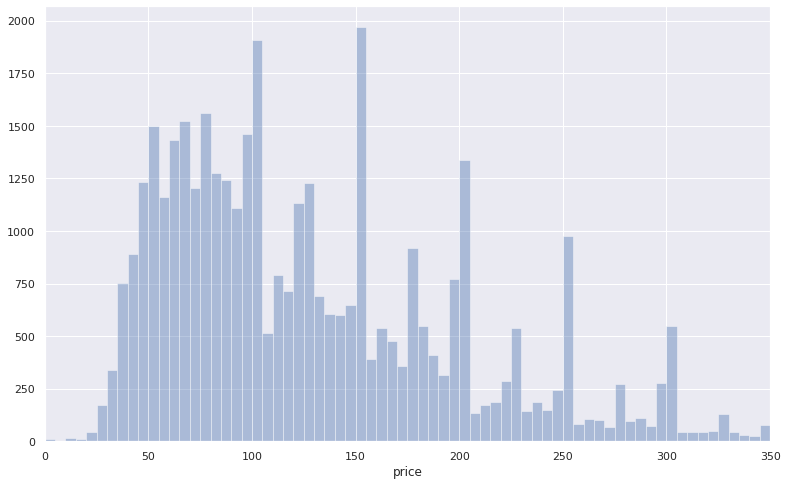

In [14]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13, 8)})
g = sns.distplot(df_small['price'], hist=True, kde=False,
             bins=2000)
g.set(xlim=(0,350))

In [15]:
df_small_ord = df_small.sort_values('price')

In [16]:
#Przydzienielnie cen do zbiorów: niska, srednia, wysoka
categories = ['niska', 'srednia', 'wysoka']
df_small_ord['priceCategory'] = pd.qcut(df_small_ord['price'], q=3, labels=categories)

In [17]:
df_small_ord.sample(10)

,id,neighbourhood_group,room_type,minimum_nights,price,availability_365,number_of_reviews,priceCategory
6924,4958223,0,1,1,99,294,277,srednia
11649,9063028,0,1,3,210,0,0,wysoka
4304,2867463,1,0,6,195,13,11,wysoka
27227,21514623,1,1,21,100,89,15,srednia
15878,12846048,1,0,13,170,46,4,wysoka
22063,17751338,1,0,3,100,353,25,srednia
32044,25025533,0,0,9,198,12,2,wysoka
47600,35827600,1,1,5,50,32,1,niska
26879,21308702,0,1,3,80,137,88,niska
34947,27703859,0,0,2,148,1,18,srednia


In [18]:
#Tabela wyświetlająca ile jest elementów w poszczególnych przedziałach cenowych
df_small_ord.groupby('priceCategory').count()

,id,neighbourhood_group,room_type,minimum_nights,price,availability_365,number_of_reviews
priceCategory,,,,,,,
niska,13982,13982,13982,13982,13982,13982,13982
srednia,13936,13936,13936,13936,13936,13936,13936
wysoka,13847,13847,13847,13847,13847,13847,13847


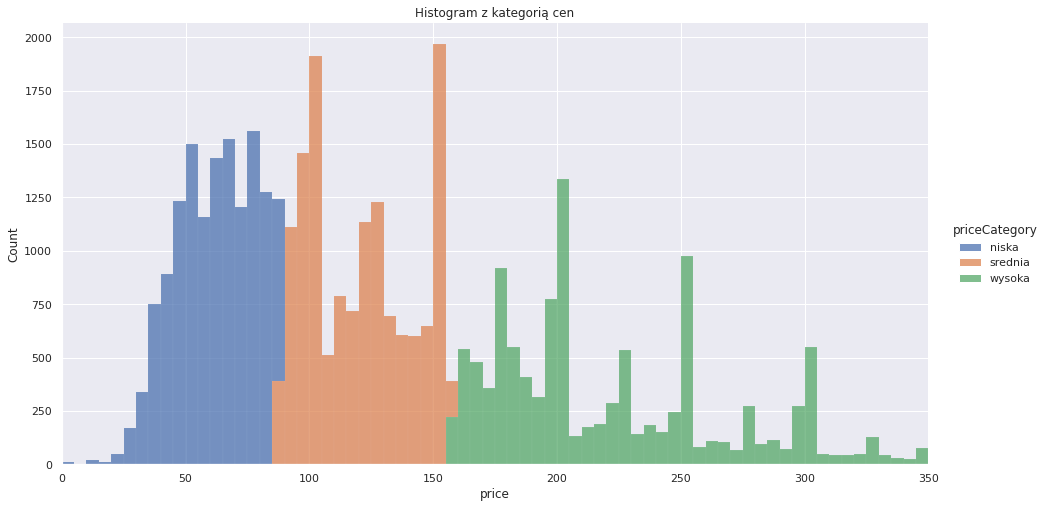

In [19]:
import seaborn as sns

g = sns.displot(data=df_small_ord, x="price", hue="priceCategory", multiple="stack", bins=2000,  height=7, aspect=1.9)
g.set(xlim=(0,350),title="Histogram z kategorią cen")


In [20]:
df_small_ord.drop('id', axis=1, inplace=True)

In [21]:
#pomieszanie wierszy ; wybranie próbki ze zbioru danych
df_small_ord = df_small_ord.sample(frac=0.5).reset_index(drop=True)

In [22]:
df_small_ord.head(5)

,neighbourhood_group,room_type,minimum_nights,price,availability_365,number_of_reviews,priceCategory
0,0,0,3,249,175,8,wysoka
1,1,1,7,45,0,0,niska
2,0,1,1,125,365,11,srednia
3,0,0,5,200,39,0,wysoka
4,1,0,1,148,82,63,srednia


#Podział na zbiór test i train

In [23]:
df_small_ord.columns

Index(['neighbourhood_group', 'room_type', 'minimum_nights', 'price',
       'availability_365', 'number_of_reviews', 'priceCategory'],
      dtype='object')

In [24]:
feature_names = ['room_type', 'neighbourhood_group', 'minimum_nights',  'availability_365','number_of_reviews']
X = df_small_ord[feature_names]
y = df_small_ord['priceCategory']

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


#Klasyfikatory


#1. Logistic Regression

In [26]:
#dostosowanie najlepszych parametrów z użyciem GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

LR = LogisticRegression()
grid_param = {
    'multi_class': ['multinomial'],
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300]
}
LR_search = GridSearchCV(LR, param_grid=grid_param, verbose=3, n_jobs=-1, cv=5)

# fitting the model for grid search 
lr = LR_search.fit(X_train , y_train)

print('Train Accuracy : %.3f'%lr.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%lr.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',lr.best_params_)


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Train Accuracy : 0.622
Test Accuracy : 0.637
Best Parameters :  {'C': 10, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'newton-cg'}


In [27]:
predicted= lr.predict(X_test)
tabela = pd.DataFrame({
    "Wartość prawdziwa": y_test.ravel(),
    "Wartość przewidziana": predicted.ravel()
}, index = df.index[-len(y_test): ]) 
tabela.head(5)

,Wartość prawdziwa,Wartość przewidziana
42630,niska,niska
42631,niska,niska
42632,niska,niska
42633,srednia,wysoka
42634,niska,niska


#2. Naive Bayes

In [28]:
#naiwny klasyfikator Bayesa

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

mnb = MultinomialNB()

params = {
          'alpha': [0.01, 0.1, 0.5, 1.0, 10.0],
         }

mnb_search = GridSearchCV(mnb, param_grid=params, verbose=3, cv=10,n_jobs=-1)

# fitting the model for grid search 
mnb_search.fit(X_train , y_train)

print('Train Accuracy : %.3f'%mnb_search.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%mnb_search.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',mnb_search.best_params_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Train Accuracy : 0.579
Test Accuracy : 0.594
Best Parameters :  {'alpha': 10.0}


#3. Decision Tree


In [30]:
#drzewo decyzyjne
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier()

params = {
          'splitter': ['best'],
          'criterion' : ["entropy", "gini"],
          'max_depth' : range(1,10),
          'min_samples_split' : range(2,10),
          'min_samples_leaf' : range(1,5)
         }

dtc_search = GridSearchCV(dtc, param_grid=params, verbose=1, cv=10, n_jobs=-1)

# fitting the model for grid search 
dtc_search.fit(X_train , y_train)

print('Train Accuracy : %.3f'%dtc_search.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%dtc_search.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',dtc_search.best_params_)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
Train Accuracy : 0.644
Test Accuracy : 0.621
Best Parameters :  {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'best'}


#4. Random Forest Classifier

In [31]:
#las losowy
from sklearn.ensemble import RandomForestClassifier
randForest = RandomForestClassifier()

params = {
          'max_depth': [1, 5, 10],
          'min_samples_leaf' : [1,5],
          'min_samples_split': [2,5],
          'n_estimators' : [10, 100, 500]

         }

randForest_search = GridSearchCV(randForest, param_grid=params, verbose=3, cv=10, n_jobs=-1)

# fitting the model for grid search 
randForest_search.fit(X_train , y_train)
print('Train Accuracy : %.3f'%randForest_search.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%randForest_search.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',randForest_search.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Train Accuracy : 0.682
Test Accuracy : 0.631
Best Parameters :  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 500}


#5. SVM

In [32]:
# svm
from sklearn.svm import SVC
svm = SVC()

params = {
          'C': [0.01,1,5,10,50],
          'gamma' : [1,0.1,0.001,5],
          'max_iter' : [-1, 1,5],
         }

svm_search = GridSearchCV(svm, param_grid=params, verbose=3, cv=5, n_jobs=-1)

# fitting the model for grid search 
svm_search.fit(X_train , y_train)

print('Train Accuracy : %.3f'%svm_search.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%svm_search.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',svm_search.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Train Accuracy : 0.632
Test Accuracy : 0.631
Best Parameters :  {'C': 50, 'gamma': 5, 'max_iter': -1}


#6. Voting Classifier

In [33]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC


voting = VotingClassifier(estimators=[ ('lr', LogisticRegression()), ('rf', RandomForestClassifier()), ('svc', SVC(probability=True))])

params = {
          'voting': ['soft', 'hard'],
          'n_jobs' : [-1,1]
         }

voting_search = GridSearchCV(voting,  param_grid=params, verbose=3, cv=8, n_jobs=-1)

# fitting the model for grid search 
voting_search.fit(X_train , y_train)

print('Train Accuracy : %.3f'%voting_search.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%voting_search.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',voting_search.best_params_)

Fitting 8 folds for each of 4 candidates, totalling 32 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Train Accuracy : 0.645
Test Accuracy : 0.632
Best Parameters :  {'n_jobs': 1, 'voting': 'hard'}


#7. Ada Boost

In [34]:
#ada boost
from sklearn.ensemble import AdaBoostClassifier
abc  = AdaBoostClassifier()

params = {
          'learning_rate': [0.001, 0.1, 1, 3],
          'n_estimators': [50, 100, 500],
          'algorithm' : ['SAMME', 'SAMME.R'],
          'random_state': [1,5, 10, 15]
         }

abc_search = GridSearchCV(abc, param_grid=params, verbose=3, cv=5, n_jobs=-1)

# fitting the model for grid search 
abc_search.fit(X_train , y_train)

print('Train Accuracy : %.3f'%abc_search.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%abc_search.best_estimator_.score(X_test, y_test))
print('Best Parameters : ',abc_search.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Train Accuracy : 0.630
Test Accuracy : 0.631
Best Parameters :  {'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 500, 'random_state': 1}
